# Sentiment Analysis by Topics

In [1]:
#Import packages
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [2]:
df1 = pd.read_pickle('topic_of_comment.pkl')
df2 = pd.read_pickle('representative_comments.pkl')

In [3]:
df1

,No.,Dominant Topic,Prob,Keywords,Comment
0,0,7.0,0.4513,"song, music, trailer, like, end, read, years_a...",This game are mix with the 80s and the future ...
1,1,6.0,0.6923,"game, people, coming, didnt, trailer, time, lo...",2902 Remember these guys are really shit
2,2,10.0,0.4156,"game, wait, good, witcher, games, best, going,...",I would replay this game 100x
3,3,10.0,0.4904,"game, wait, good, witcher, games, best, going,...",So you could complete the game without killing...
4,4,7.0,0.4154,"song, music, trailer, like, end, read, years_a...",After listening to 80 hours of aggressive musi...
...,...,...,...,...,...
162845,162845,9.0,0.5384,"pretty, city, night, ok, theres, night_city, l...",sends chills down my spine
162846,162846,7.0,0.3590,"song, music, trailer, like, end, read, years_a...",wow music is awesome
162847,162847,10.0,0.3590,"game, wait, good, witcher, games, best, going,...",oh yes cant wait for more
162848,162848,7.0,0.3590,"song, music, trailer, like, end, read, years_a...",I need MOAR music


In [4]:
df2

,No.,Dominant Topic,Prob,Keywords,Comment
0,133842,0.0,0.9077,"time, game, damn, yes, god, holy, archive, hyp...",BOYIIIIIIIIIIIIIIIII the hype is real first ga...
1,159966,0.0,0.9077,"time, game, damn, yes, god, holy, archive, hyp...",Thats a TEASER The REAL trailer is yet to be r...
2,88120,0.0,0.8846,"time, game, damn, yes, god, holy, archive, hyp...",4th time watching this and still cant get enou...
3,53286,0.0,0.8846,"time, game, damn, yes, god, holy, archive, hyp...",FUCKING ACTUALLY FUCKING HYPED AS FUCK FOR THI...
4,125600,0.0,0.8846,"time, game, damn, yes, god, holy, archive, hyp...",Between this and Star Citizen I think I might ...
...,...,...,...,...,...
125,51620,12.0,0.9231,"dont, game, want, pc, know, need, buy, dont_kn...",Isnt your PC customizable though How are they ...
126,94466,12.0,0.9231,"dont, game, want, pc, know, need, buy, dont_kn...",Here i5 6600k 46 GHz GTX 1060 Xtreme Gaming 6...
127,25582,12.0,0.9161,"dont, game, want, pc, know, need, buy, dont_kn...",Ive installed 2 GTX 1080 ti in SLI just for th...
128,87853,12.0,0.9161,"dont, game, want, pc, know, need, buy, dont_kn...",I hope it releases on Xbox one but I dont care...


In [5]:
# print the number of comments in each topic
df1['Dominant Topic'].value_counts()

0.0     28030
10.0    21491
12.0    15432
8.0     14058
1.0     11779
7.0     10600
6.0     10273
5.0     10069
2.0      9532
3.0      9168
4.0      8706
9.0      7560
11.0     6152
Name: Dominant Topic, dtype: int64

In [6]:
# Let's look at an arbitrary comment
df1['Comment'][10000]

'Music inspired from a Bollywood song named Deewani Mastani'

In [7]:
# Let’s get its sentiment score
analyzer.polarity_scores(df1['Comment'][10000])

{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939}

In [86]:
# function to print sentiments 
# of the sentence. 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative") 
  
    else : 
        print("Neutral") 
  
  
    
# Driver code 
if __name__ == "__main__" : 
  
    print("\n1st comment : " + df1['Comment'][10000]) 
    sentence = df1['Comment'][10000] 
  
    # function calling 
    sentiment_scores(sentence) 
  
    print("\n2nd comment :" + df1['Comment'][20000]) 
    sentence = df1['Comment'][20000]
    sentiment_scores(sentence) 
  
    print("\n3rd comment :" + df1['Comment'][30000])
    sentence = df1['Comment'][30000]
    sentiment_scores(sentence) 


1st comment : Music inspired from a Bollywood song named Deewani Mastani
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939}
sentence was rated as  0.0 % Negative
sentence was rated as  68.60000000000001 % Neutral
sentence was rated as  31.4 % Positive
Sentence Overall Rated As Positive

2nd comment :everyone going to build a new pc for this game
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral

3rd comment :Preordered day 1 hour 1
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral


In [9]:
# Now, we will add 4 new columns such as the neg, neu, pos and compound using the lambda function.
df1['neg'] = df1['Comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df1['neu'] = df1['Comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df1['pos'] = df1['Comment'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df1['compound'] = df1['Comment'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df1

,No.,Dominant Topic,Prob,Keywords,Comment,neg,neu,pos,compound
0,0,7.0,0.4513,"song, music, trailer, like, end, read, years_a...",This game are mix with the 80s and the future ...,0.000,0.800,0.200,0.4588
1,1,6.0,0.6923,"game, people, coming, didnt, trailer, time, lo...",2902 Remember these guys are really shit,0.394,0.606,0.000,-0.5984
2,2,10.0,0.4156,"game, wait, good, witcher, games, best, going,...",I would replay this game 100x,0.000,1.000,0.000,0.0000
3,3,10.0,0.4904,"game, wait, good, witcher, games, best, going,...",So you could complete the game without killing...,0.000,0.695,0.305,0.5448
4,4,7.0,0.4154,"song, music, trailer, like, end, read, years_a...",After listening to 80 hours of aggressive musi...,0.138,0.862,0.000,-0.1531
...,...,...,...,...,...,...,...,...,...
162845,162845,9.0,0.5384,"pretty, city, night, ok, theres, night_city, l...",sends chills down my spine,0.000,1.000,0.000,0.0000
162846,162846,7.0,0.3590,"song, music, trailer, like, end, read, years_a...",wow music is awesome,0.000,0.202,0.798,0.8360
162847,162847,10.0,0.3590,"game, wait, good, witcher, games, best, going,...",oh yes cant wait for more,0.000,0.649,0.351,0.4019
162848,162848,7.0,0.3590,"song, music, trailer, like, end, read, years_a...",I need MOAR music,0.000,1.000,0.000,0.0000


In [92]:
# let’s have a look at the compound score for each topic
a = df1.groupby('Dominant Topic')['compound'].describe()
a.sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
Dominant Topic,,,,,,,,
4.0,8706.0,0.244553,0.449345,-0.9545,0.0000,0.3612,0.62490,0.9846
10.0,21491.0,0.200623,0.445795,-0.9872,0.0000,0.1458,0.61240,0.9916
8.0,14058.0,0.172586,0.425147,-0.9906,0.0000,0.0000,0.52035,0.9936
1.0,11779.0,0.145327,0.419634,-0.9955,0.0000,0.0000,0.45880,0.9899
3.0,9168.0,0.133416,0.404610,-0.9811,0.0000,0.0000,0.42150,0.9805
5.0,10069.0,0.114956,0.385389,-0.9750,0.0000,0.0000,0.42150,0.9878
12.0,15432.0,0.105720,0.407320,-0.9825,0.0000,0.0000,0.40200,0.9906
7.0,10600.0,0.099588,0.380237,-0.9782,0.0000,0.0000,0.36120,0.9817
9.0,7560.0,0.078598,0.392266,-0.9694,0.0000,0.0000,0.37160,0.9709


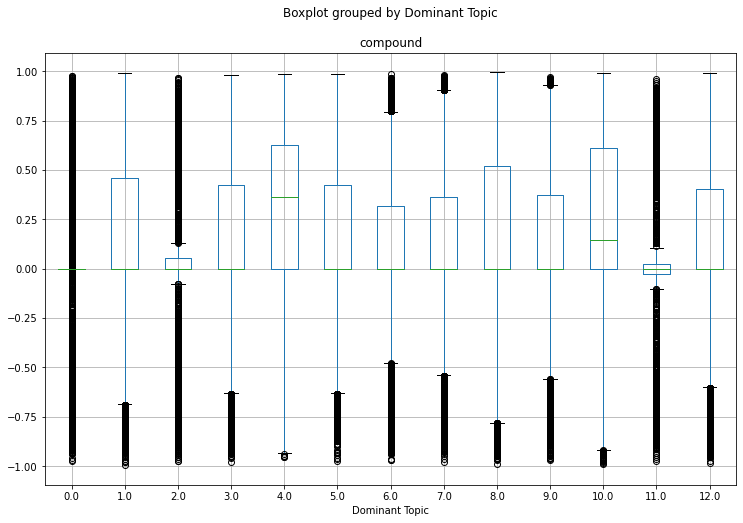

In [11]:
# Let’s also have a look at the boxplot
df1.boxplot(by='Dominant Topic', column='compound', figsize=(12,8))

In [12]:
# Do the same steps on the dataframe of representative comments
df2['neg'] = df2['Comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df2['neu'] = df2['Comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df2['pos'] = df2['Comment'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df2['compound'] = df2['Comment'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df2

,No.,Dominant Topic,Prob,Keywords,Comment,neg,neu,pos,compound
0,133842,0.0,0.9077,"time, game, damn, yes, god, holy, archive, hyp...",BOYIIIIIIIIIIIIIIIII the hype is real first ga...,0.163,0.837,0.000,-0.5423
1,159966,0.0,0.9077,"time, game, damn, yes, god, holy, archive, hyp...",Thats a TEASER The REAL trailer is yet to be r...,0.283,0.717,0.000,-0.5766
2,88120,0.0,0.8846,"time, game, damn, yes, god, holy, archive, hyp...",4th time watching this and still cant get enou...,0.000,1.000,0.000,0.0000
3,53286,0.0,0.8846,"time, game, damn, yes, god, holy, archive, hyp...",FUCKING ACTUALLY FUCKING HYPED AS FUCK FOR THI...,0.459,0.437,0.104,-0.8459
4,125600,0.0,0.8846,"time, game, damn, yes, god, holy, archive, hyp...",Between this and Star Citizen I think I might ...,0.107,0.800,0.093,-0.0772
...,...,...,...,...,...,...,...,...,...
125,51620,12.0,0.9231,"dont, game, want, pc, know, need, buy, dont_kn...",Isnt your PC customizable though How are they ...,0.094,0.800,0.107,0.0747
126,94466,12.0,0.9231,"dont, game, want, pc, know, need, buy, dont_kn...",Here i5 6600k 46 GHz GTX 1060 Xtreme Gaming 6...,0.000,0.836,0.164,0.6486
127,25582,12.0,0.9161,"dont, game, want, pc, know, need, buy, dont_kn...",Ive installed 2 GTX 1080 ti in SLI just for th...,0.000,0.819,0.181,0.6486
128,87853,12.0,0.9161,"dont, game, want, pc, know, need, buy, dont_kn...",I hope it releases on Xbox one but I dont care...,0.241,0.504,0.255,0.0708


In [95]:
b = df2.groupby('Dominant Topic')['compound'].describe()
b.sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
Dominant Topic,,,,,,,,
8.0,10.0,0.39616,0.362802,-0.1280,0.095100,0.35060,0.773950,0.7986
1.0,10.0,0.39160,0.497291,-0.5423,0.090300,0.51045,0.770025,0.9106
3.0,10.0,0.36904,0.163224,-0.0513,0.361200,0.36120,0.440400,0.5622
4.0,10.0,0.31434,0.728882,-0.8625,-0.385975,0.75475,0.836200,0.8867
6.0,10.0,0.15791,0.219732,0.0000,0.000000,0.03860,0.296750,0.5994
5.0,10.0,0.14154,0.382063,-0.4767,0.000000,0.00000,0.330300,0.8658
7.0,10.0,0.10647,0.268670,-0.4404,0.000000,0.00000,0.361200,0.4215
2.0,10.0,0.05431,0.256151,-0.3400,0.000000,0.00000,0.000000,0.6808
11.0,10.0,0.02889,0.264655,-0.4019,0.000000,0.00000,0.000000,0.6908


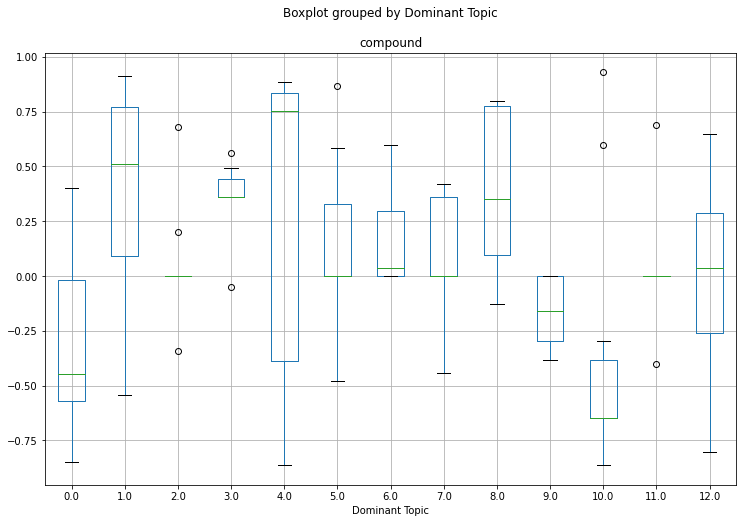

In [14]:
df2.boxplot(by='Dominant Topic', column='compound', figsize=(12,8))

# Overall Sentiment Analysis

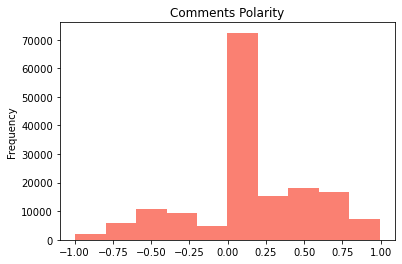

In [85]:
# the polarity of a comment
df1['compound'].plot.hist(color='salmon', title='Comments Polarity')

In [71]:
positive = df1[df1['compound'] >= 0.05]
negative = df1[df1['compound'] <= -0.05]

In [78]:
# number of positive, neutral and negative comments
pos_num = len(positive)
neg_num = len(negative)
neu_num = len(df1) - pos_num - neg_num

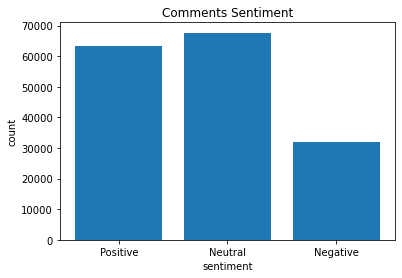

In [93]:
# the distribution of reviews with sentiment across the dataset
import matplotlib.pyplot as plt
name_list = ['Positive','Neutral','Negative']
num_list = [pos_num,neu_num,neg_num]
plt.bar(range(len(num_list)), num_list, tick_label=name_list, )
plt.title('Comments Sentiment')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()